Python for Math and Stat: Homework #6 by Ethan Schacht

In [36]:
import math as m
import matplotlib.pyplot as plt
import random as r

Problem 1: Sets of multiples of 3 and 5

In [2]:
set3 = set([i for i in range(1,100) if i % 3 == 0])
set5 = set([i for i in range(1,100) if i % 5 == 0])

set3and5 = set3 & set5
set3or5 = set3 | set5
set3not5 = set([i for i in range(1,100) if i % 3 == 0 and i % 5 != 0])

Problem 2: Read numbers.txt and sum the numbers

In [4]:
with open('numbers.txt') as fp: 
    nums = fp.read()
    
splitted_nums = nums.split()

numbers_sum = sum([int(i) for i in splitted_nums])
numbers_sum

506037476

Problem 3.1: Gets the number of words in the file

In [5]:
with open('wordlist.txt') as fp: 
    words = fp.read()
split_words = words.splitlines()

In [6]:
words_ct = 0
for i in split_words:
    words_ct += 1
words_ct

7776

Problem 3.2: Gets the number of letters in the file

In [7]:
freq_list = []
for word in split_words:
    counter = 0
    for i in word:
        counter += 1
    freq_list.append(counter)
letters_ct = sum(freq_list)
letters_ct

54368

Problem 3.3: Gets number of three letter words

In [8]:
three_let = []
letters3_ct = 0
for i in freq_list:
    if i == 3:
        letters3_ct += 1
letters3_ct

82

Problem 3.4: Gets number of words where first letter is the same as the last

In [9]:
begin_end_words = []
for word in split_words:
    for i in range(len(word)):
        if word[0] == word[len(word) - 1]:
            begin_end_words.append(word)
distinct_words = list(set(begin_end_words)) #makes list of distinct words due to repeats caused by outer loop (num repeats of the word = num characters in the word)
begin_end_ct = 0
for i in distinct_words:
    begin_end_ct += 1
begin_end_ct

403

Problem 3.5: Gets number of words containing "cu"

In [10]:
cu_list = []
for word in split_words: #I don't understand why I'm not getting repeats here as opposed to the previous problem as the method is the same
    for i in range(len(word)):
        if word[i - 1] == "c" and word[i] == "u":
            cu_list.append(word)
cu_ct = 0
for i in cu_list:
    cu_ct += 1
cu_ct

124

Problem 3.6: Gets number of words that are palindromes

In [11]:
def reverse(word):
    rev_list = []
    for i in range(len(word)):
        rev_list.append(word[len(word) - 1 - i])
    return rev_list

pal_list = []
for word in split_words:
    if reverse(word) == list(word):
        pal_list.append(word)
pal_ct = 0
for i in pal_list:
    pal_ct += 1
pal_ct

10

Problem 3.7: This function returns a list of frequencies of words for each first letter

In [12]:
def first_letter_freq(words):
    first_letters = [chr(i) for i in range(97,123)]
    freq_list = []
    for i in first_letters:
        letter_counter = 0
        for word in words:
            if word[0] == i:
                letter_counter += 1
        freq_list.append(letter_counter)
    return freq_list
first_letter_freq(["all", "cat", "dog", "zoo"])

[1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Now we will plug wordlist.txt into this function and graph the results

In [ ]:
x_vals = [chr(i) for i in range(97,123)]
y_vals = first_letter_freq(split_words)

plt.bar(x_vals, y_vals)
plt.xlabel("Letter")
plt.ylabel("Frequency")
plt.title("First Letter Frequencies in wordlist.txt")
plt.show()

Problem 4: This function returns a dictionary where each key is a letter and the value is the frequency of that letter in "alice.txt"

In [38]:
def letter_freq_upper(list_words):
    letters = [chr(i) for i in range(65, 91)]
    freq_list = []
    for i in letters:
        letter_counter = 0
        for word in list_words:
            for letter in word:
                if letter == i:
                    letter_counter += 1
        freq_list.append(letter_counter)
    return freq_list
first_letter_freq_upper(["Cat"])

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [39]:
def letter_freq(file):
    with open(file) as fp: 
        alice = fp.read()
    alice = alice.split()
    alice = [word.upper() for word in alice]
    
    letters = [chr(i) for i in range(65, 91)]
    alice_freq = letter_freq_upper(alice)
    
    return dict(zip(letters, alice_freq))

letter_freq("alice2.txt")

{'A': 8825,
 'B': 1482,
 'C': 2421,
 'D': 4940,
 'E': 13618,
 'F': 2003,
 'G': 2534,
 'H': 7396,
 'I': 7543,
 'J': 146,
 'K': 1159,
 'L': 4732,
 'M': 2110,
 'N': 7026,
 'O': 8160,
 'P': 1543,
 'Q': 212,
 'R': 5467,
 'S': 6513,
 'T': 10727,
 'U': 3475,
 'V': 853,
 'W': 2678,
 'X': 152,
 'Y': 2265,
 'Z': 78}

Now the results will be graphed

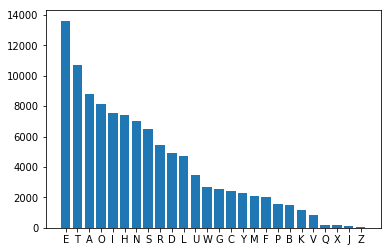

In [53]:
x_vals = ["E","T","A","O","I","H","N","S","R","D","L","U","W","G","C","Y","M","F","P","B","K","V","Q","X","J","Z"]
y_vals = sorted(letter_freq("alice2.txt").values())
y_vals.reverse()
plt.bar(x_vals, y_vals)
plt.show()

Challenge Problem: Make the caesar and uncaesar shift functions

In [9]:
def caesar(text, shift):
    encoded_txt = []
    for letter in text:
        if ord(letter) >= 65 and ord(letter) <= 90:
            if ord(letter) + shift <= 90:
                encoded_txt.append(chr(ord(letter) + shift))
            else:
                encoded_txt.append(chr(ord(letter) + shift - 26))
        else:
            encoded_txt.append(letter)
    message = ""
    for letter in encoded_txt:
        message += letter
        
    return message

caesar("DONT DRINK AND DERIVE.", 15)

'SDCI SGXCZ PCS STGXKT.'

In [14]:
def uncaesar(text, shift):
    encoded_txt = []
    for letter in text:
        if ord(letter) >= 65 and ord(letter) <= 90:
            if ord(letter) - shift >= 65:
                encoded_txt.append(chr(ord(letter) - shift))
            else:
                encoded_txt.append(chr(ord(letter) - shift + 26))
        else:
            encoded_txt.append(letter)
    message = ""
    for letter in encoded_txt:
        message += letter
        
    return message

uncaesar("SDCI SGXCZ PCS STGXKT.", 15)

'DONT DRINK AND DERIVE.'

Challenge Problem pt 2: Decode the mathematicians

In [18]:
[uncaesar("V UNIR UNEQYL RIRE XABJA N ZNGURZNGVPVNA JUB JNF PNCNOYR BS ERNFBAVAT", i) for i in range(1,27)]

# 'I HAVE HARDLY EVER KNOWN A MATHEMATICIAN WHO WAS CAPABLE OF REASONING'

['U TMHQ TMDPXK QHQD WZAIZ M YMFTQYMFUOUMZ ITA IME OMBMNXQ AR DQMEAZUZS',
 'T SLGP SLCOWJ PGPC VYZHY L XLESPXLETNTLY HSZ HLD NLALMWP ZQ CPLDZYTYR',
 'S RKFO RKBNVI OFOB UXYGX K WKDROWKDSMSKX GRY GKC MKZKLVO YP BOKCYXSXQ',
 'R QJEN QJAMUH NENA TWXFW J VJCQNVJCRLRJW FQX FJB LJYJKUN XO ANJBXWRWP',
 'Q PIDM PIZLTG MDMZ SVWEV I UIBPMUIBQKQIV EPW EIA KIXIJTM WN ZMIAWVQVO',
 'P OHCL OHYKSF LCLY RUVDU H THAOLTHAPJPHU DOV DHZ JHWHISL VM YLHZVUPUN',
 'O NGBK NGXJRE KBKX QTUCT G SGZNKSGZOIOGT CNU CGY IGVGHRK UL XKGYUTOTM',
 'N MFAJ MFWIQD JAJW PSTBS F RFYMJRFYNHNFS BMT BFX HFUFGQJ TK WJFXTSNSL',
 'M LEZI LEVHPC IZIV ORSAR E QEXLIQEXMGMER ALS AEW GETEFPI SJ VIEWSRMRK',
 'L KDYH KDUGOB HYHU NQRZQ D PDWKHPDWLFLDQ ZKR ZDV FDSDEOH RI UHDVRQLQJ',
 'K JCXG JCTFNA GXGT MPQYP C OCVJGOCVKEKCP YJQ YCU ECRCDNG QH TGCUQPKPI',
 'J IBWF IBSEMZ FWFS LOPXO B NBUIFNBUJDJBO XIP XBT DBQBCMF PG SFBTPOJOH',
 'I HAVE HARDLY EVER KNOWN A MATHEMATICIAN WHO WAS CAPABLE OF REASONING',
 'H GZUD GZQCKX DUDQ JMNVM Z LZSGDLZSH

In [19]:
[uncaesar("GVIWVTK ELDSVIJ CZBV GVIWVTK DVE RIV MVIP IRIV", i) for i in range(1,27)]

# 'PERFECT NUMBERS LIKE PERFECT MEN ARE VERY RARE'

['FUHVUSJ DKCRUHI BYAU FUHVUSJ CUD QHU LUHO HQHU',
 'ETGUTRI CJBQTGH AXZT ETGUTRI BTC PGT KTGN GPGT',
 'DSFTSQH BIAPSFG ZWYS DSFTSQH ASB OFS JSFM FOFS',
 'CRESRPG AHZOREF YVXR CRESRPG ZRA NER IREL ENER',
 'BQDRQOF ZGYNQDE XUWQ BQDRQOF YQZ MDQ HQDK DMDQ',
 'APCQPNE YFXMPCD WTVP APCQPNE XPY LCP GPCJ CLCP',
 'ZOBPOMD XEWLOBC VSUO ZOBPOMD WOX KBO FOBI BKBO',
 'YNAONLC WDVKNAB URTN YNAONLC VNW JAN ENAH AJAN',
 'XMZNMKB VCUJMZA TQSM XMZNMKB UMV IZM DMZG ZIZM',
 'WLYMLJA UBTILYZ SPRL WLYMLJA TLU HYL CLYF YHYL',
 'VKXLKIZ TASHKXY ROQK VKXLKIZ SKT GXK BKXE XGXK',
 'UJWKJHY SZRGJWX QNPJ UJWKJHY RJS FWJ AJWD WFWJ',
 'TIVJIGX RYQFIVW PMOI TIVJIGX QIR EVI ZIVC VEVI',
 'SHUIHFW QXPEHUV OLNH SHUIHFW PHQ DUH YHUB UDUH',
 'RGTHGEV PWODGTU NKMG RGTHGEV OGP CTG XGTA TCTG',
 'QFSGFDU OVNCFST MJLF QFSGFDU NFO BSF WFSZ SBSF',
 'PERFECT NUMBERS LIKE PERFECT MEN ARE VERY RARE',
 'ODQEDBS MTLADQR KHJD ODQEDBS LDM ZQD UDQX QZQD',
 'NCPDCAR LSKZCPQ JGIC NCPDCAR KCL YPC TCPW PYPC',
 'MBOCBZQ KRJYBOP IFHB MBOCBZQ 

In [20]:
[uncaesar("GR GQ LMR ACPRYGL RFYR CTCPWRFGLE GQ SLACPRYGL", i) for i in range(1,27)]

# 'IT IS NOT CERTAIN THAT EVERYTHING IS UNCERTAIN'

['FQ FP KLQ ZBOQXFK QEXQ BSBOVQEFKD FP RKZBOQXFK',
 'EP EO JKP YANPWEJ PDWP ARANUPDEJC EO QJYANPWEJ',
 'DO DN IJO XZMOVDI OCVO ZQZMTOCDIB DN PIXZMOVDI',
 'CN CM HIN WYLNUCH NBUN YPYLSNBCHA CM OHWYLNUCH',
 'BM BL GHM VXKMTBG MATM XOXKRMABGZ BL NGVXKMTBG',
 'AL AK FGL UWJLSAF LZSL WNWJQLZAFY AK MFUWJLSAF',
 'ZK ZJ EFK TVIKRZE KYRK VMVIPKYZEX ZJ LETVIKRZE',
 'YJ YI DEJ SUHJQYD JXQJ ULUHOJXYDW YI KDSUHJQYD',
 'XI XH CDI RTGIPXC IWPI TKTGNIWXCV XH JCRTGIPXC',
 'WH WG BCH QSFHOWB HVOH SJSFMHVWBU WG IBQSFHOWB',
 'VG VF ABG PREGNVA GUNG RIRELGUVAT VF HAPREGNVA',
 'UF UE ZAF OQDFMUZ FTMF QHQDKFTUZS UE GZOQDFMUZ',
 'TE TD YZE NPCELTY ESLE PGPCJESTYR TD FYNPCELTY',
 'SD SC XYD MOBDKSX DRKD OFOBIDRSXQ SC EXMOBDKSX',
 'RC RB WXC LNACJRW CQJC NENAHCQRWP RB DWLNACJRW',
 'QB QA VWB KMZBIQV BPIB MDMZGBPQVO QA CVKMZBIQV',
 'PA PZ UVA JLYAHPU AOHA LCLYFAOPUN PZ BUJLYAHPU',
 'OZ OY TUZ IKXZGOT ZNGZ KBKXEZNOTM OY ATIKXZGOT',
 'NY NX STY HJWYFNS YMFY JAJWDYMNSL NX ZSHJWYFNS',
 'MX MW RSX GIVXEMR XLEX IZIVCX

In [22]:
[uncaesar("WT CBZM W VOR HVS HVSCFSAG! HVSB W GVCIZR TWBR HVS DFCCTG SOGWZM SBCIUV", i) for i in range(1,27)]

# 'IF ONLY I HAD THE THEOREMS! THEN I SHOULD FIND THE PROOFS EASILY ENOUGH'

['VS BAYL V UNQ GUR GURBERZF! GURA V FUBHYQ SVAQ GUR CEBBSF RNFVYL RABHTU',
 'UR AZXK U TMP FTQ FTQADQYE! FTQZ U ETAGXP RUZP FTQ BDAARE QMEUXK QZAGST',
 'TQ ZYWJ T SLO ESP ESPZCPXD! ESPY T DSZFWO QTYO ESP ACZZQD PLDTWJ PYZFRS',
 'SP YXVI S RKN DRO DROYBOWC! DROX S CRYEVN PSXN DRO ZBYYPC OKCSVI OXYEQR',
 'RO XWUH R QJM CQN CQNXANVB! CQNW R BQXDUM ORWM CQN YAXXOB NJBRUH NWXDPQ',
 'QN WVTG Q PIL BPM BPMWZMUA! BPMV Q APWCTL NQVL BPM XZWWNA MIAQTG MVWCOP',
 'PM VUSF P OHK AOL AOLVYLTZ! AOLU P ZOVBSK MPUK AOL WYVVMZ LHZPSF LUVBNO',
 'OL UTRE O NGJ ZNK ZNKUXKSY! ZNKT O YNUARJ LOTJ ZNK VXUULY KGYORE KTUAMN',
 'NK TSQD N MFI YMJ YMJTWJRX! YMJS N XMTZQI KNSI YMJ UWTTKX JFXNQD JSTZLM',
 'MJ SRPC M LEH XLI XLISVIQW! XLIR M WLSYPH JMRH XLI TVSSJW IEWMPC IRSYKL',
 'LI RQOB L KDG WKH WKHRUHPV! WKHQ L VKRXOG ILQG WKH SURRIV HDVLOB HQRXJK',
 'KH QPNA K JCF VJG VJGQTGOU! VJGP K UJQWNF HKPF VJG RTQQHU GCUKNA GPQWIJ',
 'JG POMZ J IBE UIF UIFPSFNT! UIFO J TIPVME GJOE UIF QSPPGT FBTJMZ FOPVHI',
 'IF ONLY I 